In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
rides = pd.read_csv("rides_weather_hoildays_all_ops.csv")
rides.head()

,Unnamed: 0,date,year,month,day,month_year,dow,year.1,weekend_flag,yesterday,...,Labor Day,Columbus Day,Veterans Day,Thanksgiving Day,Christmas Day,Christmas Eve,New Years Eve,PRCP,TMAX,TMIN
0,0,2014-01-21,2014,1,21,12014,2,2014,False,2014-01-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,49.0
1,1,2014-01-22,2014,1,22,12014,3,2014,False,2014-01-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,48.0
2,2,2014-01-23,2014,1,23,12014,4,2014,False,2014-01-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,48.0
3,3,2014-01-24,2014,1,24,12014,5,2014,False,2014-01-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,49.0
4,4,2014-01-25,2014,1,25,12014,6,2014,True,2014-01-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,50.0


In [3]:
rides = rides[rides.Holiday==0.0]

In [92]:
split = int(.6*len(rides))

train_data = rides.iloc[0:split, :]
test_data = rides.iloc[split:, :]

features = ['month', 'day', 'dow', 'year', 'season', 'weekend_flag', 
            'yesterday_swipes', 'year_ago_swipes', 'weekday_avg_month_prior', 
            'weekend_avg_month_prior', 'PRCP', 'TMAX', 'TMIN']

X = rides[features]
y = rides['swipes']

X_train = train_data[features]
X_test = test_data[features] 
y_train = train_data['swipes']
y_test = test_data['swipes']

In [97]:
rf_rides = RandomForestRegressor(n_estimators=800,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth=100,
 bootstrap=True).fit(X_train, y_train)

In [98]:
rf_rides.score(X_test, y_test) 

0.9697239692738671

In [99]:
# Use the forest's predict method on the test data
predictions = rf_rides.predict(X_test)
# Calculate the absolute errors
abs_errors = abs(predictions - y_test)
sq_errors = (predictions - y_test)**2
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(abs_errors), 4))
print('RMSE :', round(np.sqrt(np.mean(sq_errors)), 4))

Mean Absolute Error: 25053.5906
RMSE : 36140.7614


In [100]:
from sklearn.metrics import explained_variance_score
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test, predictions)

0.9703593030842568

In [101]:
from sklearn.metrics import explained_variance_score
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test, predictions)

0.9703593030842568

In [102]:
abs_errors_percent = abs((predictions - y_test)/y_test)
print("This model's predictions is on average about ", round(np.mean(abs_errors_percent), 4), "off of the actual ridership for that day")


This model's predictions is on average about  0.0401 off of the actual ridership for that day


In [103]:
feature_importances_all = pd.DataFrame(rf_rides.feature_importances_,
                                     index = X_train.columns, 
                                     columns=['importance']).sort_values('importance', ascending=False)
feature_importances_all

,importance
weekend_flag,0.722498
yesterday_swipes,0.220079
dow,0.013137
weekday_avg_month_prior,0.012431
year,0.006772
year_ago_swipes,0.006009
PRCP,0.003624
month,0.003530
TMIN,0.003522
TMAX,0.002902


In [104]:
errors_percent = (predictions - y_test)/y_test
test_errors = X_test
test_errors['actual'] = y_test
test_errors['predicted'] = predictions
test_errors['errors_percents'] = errors_percent
test_errors.sort_values('errors_percents')[['month', 'day', 'year', 'errors_percents', 'actual', 'predicted']]

,month,day,year,errors_percents,actual,predicted
1757,11,13,2018,-0.239809,831737,632278.59375
1802,12,28,2018,-0.183378,523107,427180.91750
1084,1,9,2017,-0.179962,532534,436697.96250
1491,2,20,2018,-0.161857,665281,557600.54375
1449,1,9,2018,-0.147145,755471,644307.01875
1251,6,25,2017,-0.141486,376233,323001.31000
1615,6,24,2018,-0.140216,391022,336194.47500
1092,1,17,2017,-0.136094,653032,564158.14000
1438,12,29,2017,-0.134216,501799,434449.51250
1096,1,21,2017,-0.125991,551251,481798.31125


Text(0.5, 1.0, 'Test Set Error Percentage')

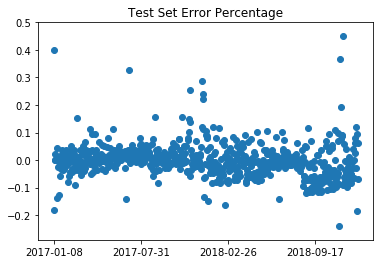

In [105]:
from matplotlib.pyplot import scatter, title
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter(test_data['date'], errors_percent)
ax.set_xticks(ax.get_xticks()[::200])
title("Test Set Error Percentage")